# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()


True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
monthly_income = "12000"

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"


requests.get(btc_url)
requests.get(eth_url)


response_data_btc = requests.get(btc_url)
response_data_eth = requests.get(eth_url)

response_content_btc = response_data_btc.content
response_content_eth = response_data_eth.content

print(response_content_btc)
print(response_content_eth)

data_btc = response_data_btc.json()
data_eth = response_data_eth.json()
print(json.dumps(data_btc, indent=4))
print(json.dumps(data_eth, indent=4))


b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18474600,\n\t\t\t"total_supply": 18474600,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 11627.7800000000000000,\n\t\t\t\t\t"volume_24h": 18953418713,\n\t\t\t\t\t"market_cap": 214711639443,\n\t\t\t\t\t"percentage_change_1h": 0.1189312077158110,\n\t\t\t\t\t"percentage_change_24h": 1.2588530432773800,\n\t\t\t\t\t"percentage_change_7d": -0.4162534790638490,\n\t\t\t\t\t"percent_change_1h": 0.1189312077158110,\n\t\t\t\t\t"percent_change_24h": 1.2588530432773800,\n\t\t\t\t\t"percent_change_7d": -0.4162534790638490\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1598756311\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1598756311,\n\t\t"num_cryptocurrencies": 1491,\n\t\t"error": null\n\t}\n}'
b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symb

In [8]:
# Fetch current BTC price # Fetch current ETH price

btc_price = data_btc["data"]["1"]["quotes"]["USD"]["price"]
eth_price = data_eth["data"]["1027"]["quotes"]["USD"]["price"]

print(btc_price)
print(eth_price)

#Compute current value of my crypto

my_btc_value = round(my_btc * btc_price,2)
my_eth_value = round(my_eth * meth_price,2)
print(my_btc_value)
print(my_eth_value)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")



11627.78
405.77
13953.34
2150.58
The current value of your 1.2 BTC is $13953.34
The current value of your 5.3 ETH is $2150.58


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Current amount of shares
my_agg = 200
my_spy = 50
tickers = ["AGG", "SPY"]

shares_qty = {"shares": [200,50]}
df_shares = pd.DataFrame(shares_qty, index=tickers)

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [14]:
# Format current date as ISO format
today = pd.Timestamp.now(tz="America/Chicago").isoformat()
print(today)
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

start_date = pd.Timestamp("2020-08-28", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-28", tz="America/New_York").isoformat()

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df.round(decimals=2)
df_ticker.head()
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

2020-08-29T22:03:53.512570-05:00
Current AGG closing price: $118.12
Current SPY closing price: $350.54


In [15]:
# Compute the current value of shares
SPY_total_val = spy_close_price * df_shares.loc ["SPY"] ['shares']
AGG_total_val = agg_close_price * df_shares.loc ["AGG"] ['shares']

# Print current value of share
print(f"The current value of my {df_shares.loc['SPY']['shares']} SPY shares is ${SPY_total_val}")
print(f"The current value of my {df_shares.loc['AGG']['shares']} AGG shares is ${AGG_total_val}")

The current value of my 50 SPY shares is $17527.0
The current value of my 200 AGG shares is $23624.0


### Savings Health Analysis

In [16]:
# Create savings DataFrame
crypto_value = (my_btc_value + my_eth_value)
shares_value = (SPY_total_val + AGG_total_val)

# Display savings DataFrame
savings_value = {
    "Amount": (crypto_value, shares_value),
    "Crypto": (crypto_value),
    "Shares": (shares_value)}
df_savings = pd.DataFrame(savings_value, index=["Crypto $","Shares"], columns=["Amount"])
df_savings

,Amount
Crypto $,16103.92
Shares,41151.00


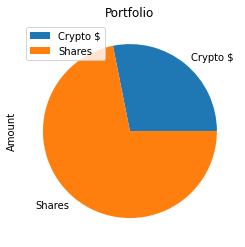

In [41]:
# Plot savings pie chart
df_savings.plot.pie(y = "Amount", title = "Portfolio")

In [19]:
# Set ideal emergency fund


# Calculate total amount of savings

#surplus_shortage = round(total_savings - emergency_fund,2)
# Validate saving health


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
end_date = pd.Timestamp.now(tz="America/Chicago")
start_date = (end_date - pd.DateOffset(years=5)).isoformat()

# Set the ticker information
tickers = ["SPY","AGG"]

df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

AGG                                       \
                             open    high       low   close     volume   
2015-08-31 00:00:00-04:00  109.28  109.37  108.9000  108.92  3866305.0   
2015-09-01 00:00:00-04:00  108.83  109.11  108.7700  109.01  3083045.0   
2015-09-02 00:00:00-04:00  108.92  109.05  108.8100  108.90  3273302.0   
2015-09-03 00:00:00-04:00  109.06  109.12  108.8701  109.04  1676171.0   
2015-09-04 00:00:00-04:00  109.19  109.33  109.0200  109.28  1529407.0   

                              SPY                                      
                             open     high     low   close     volume  
2015-08-31 00:00:00-04:00  198.11  199.125  197.01  197.60  108023599  
2015-09-01 00:00:00-04:00  193.12  194.770  190.73  191.61  173963880  
2015-09-02 00:00:00-04:00  194.65  195.460  192.42  195.46  120044919  
2015-09-03 00:00:00-04:00  196.26  198.050  194.96  195.55  117191452  
2015-09-04 00:00:00-04:00  192.85  193.860  191.61  192.56  121958169

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-08-31 00:00:00-04:00  109.28  109.37  108.9000  108.92  3866305.0   
2015-09-01 00:00:00-04:00  108.83  109.11  108.7700  109.01  3083045.0   
2015-09-02 00:00:00-04:00  108.92  109.05  108.8100  108.90  3273302.0   
2015-09-03 00:00:00-04:00  109.06  109.12  108.8701  109.04  1676171.0   
2015-09-04 00:00:00-04:00  109.19  109.33  109.0200  109.28  1529407.0   

                                           SPY                           \
                          daily_return    open     high     low   close   
2015-08-31 00:00:00-04:00          NaN  198.11  199.125  197.01  197.60   
2015-09-01 00:00:00-04:00     0.000826  193.12  194.770  190.73  191.61   
2015-09-02 00:00:00-04:00    -0.001009  194.65  195.460  192.42  195.46   
2015-09-03 00:00:00-04:00     0.001286  196.26  198.050  194.96  195.55   
2015-09-04 00:00:00-04:00     0.002201  192.85  193.860  191.61  192.56   

                                                   
                              volume daily_return  
2015-08-31 00:00:00-04:00  108023599          NaN  
2015-09-01 00:00:00-04:00  173963880    -0.030314  
2015-09-02 00:00:00-04:00  120044919     0.020093  
2015-09-03 00:00:00-04:00  117191452     0.000460  
2015-09-04 00:00:00-04:00  121958169    -0.015290

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995243,0.997849,1.000076,1.004213,1.001546,0.998929,1.008419,1.002040,0.999088,1.003411,...,1.003447,1.001247,1.004188,1.004426,1.002506,0.995265,1.000527,1.002463,1.002638,0.990505
2,0.992107,0.998915,0.997827,1.000666,1.002004,0.998248,1.013606,1.001549,1.000645,0.997248,...,0.998016,1.002805,1.007197,1.014123,0.992060,1.006605,0.993613,1.007165,1.010802,0.984344
3,0.994199,0.994447,0.991602,0.997928,0.999176,1.004800,1.008950,0.997832,1.013643,0.995570,...,1.000536,1.009390,1.009231,1.008311,0.996639,1.007058,0.990828,1.004023,1.007008,0.984310
4,0.990001,0.992461,0.989936,0.992827,0.994849,1.005035,1.010565,0.989585,1.017743,0.994108,...,0.997613,1.008234,1.020895,1.006419,1.002328,1.008618,0.991255,1.005184,1.013290,0.989554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.588675,5.206844,6.329976,8.588727,7.679985,8.641071,5.168928,5.100625,5.640444,8.225478,...,5.372207,3.601115,7.597933,5.977519,5.161987,11.477615,6.421809,6.341354,7.017224,6.449804
7557,6.638108,5.238720,6.309721,8.558717,7.646547,8.698871,5.155573,5.030037,5.664356,8.287849,...,5.408324,3.582144,7.612795,5.966110,5.166168,11.414956,6.453297,6.350884,7.004592,6.490842
7558,6.591635,5.220357,6.294676,8.541520,7.723150,8.632552,5.178223,5.053538,5.636827,8.274629,...,5.410456,3.592186,7.569862,5.977427,5.179722,11.404776,6.391099,6.330718,7.017196,6.403054
7559,6.622804,5.228368,6.311798,8.536422,7.738001,8.750043,5.171013,5.019862,5.692009,8.285929,...,5.386392,3.595916,7.655981,6.009641,5.181584,11.409092,6.388129,6.390898,7.094952,6.429545


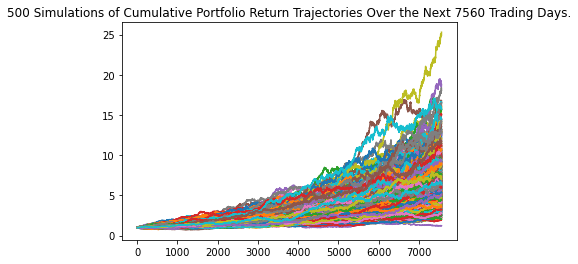

In [25]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

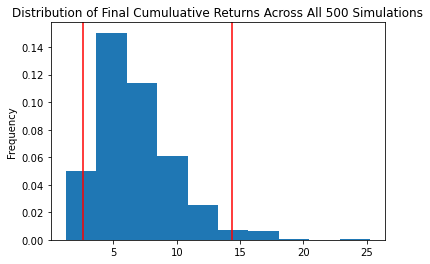

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              6.762936
std               3.124389
min               1.229308
25%               4.554735
50%               6.182509
75%               8.245989
max              25.286757
95% CI Lower      2.571443
95% CI Upper     14.343297
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
initial_investment = 20000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $51428.87 and $286865.95


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [32]:
# Set initial investment
initial_investment_50pct = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment_50pct,2)
ci_upper = round(tbl[9]*initial_investment_50pct,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77143.3 and $430298.92


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [39]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [40]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.202273
std               0.145565
min               0.856322
25%               1.100622
50%               1.197687
75%               1.292270
max               1.695081
95% CI Lower      0.928556
95% CI Upper      1.517173
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics


In [33]:
# Set initial investment


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $154286.61 and $860597.84
